<a href="https://colab.research.google.com/github/wechavar/Super_Store_Analisis/blob/main/Super_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Ventas con Python y Pandas



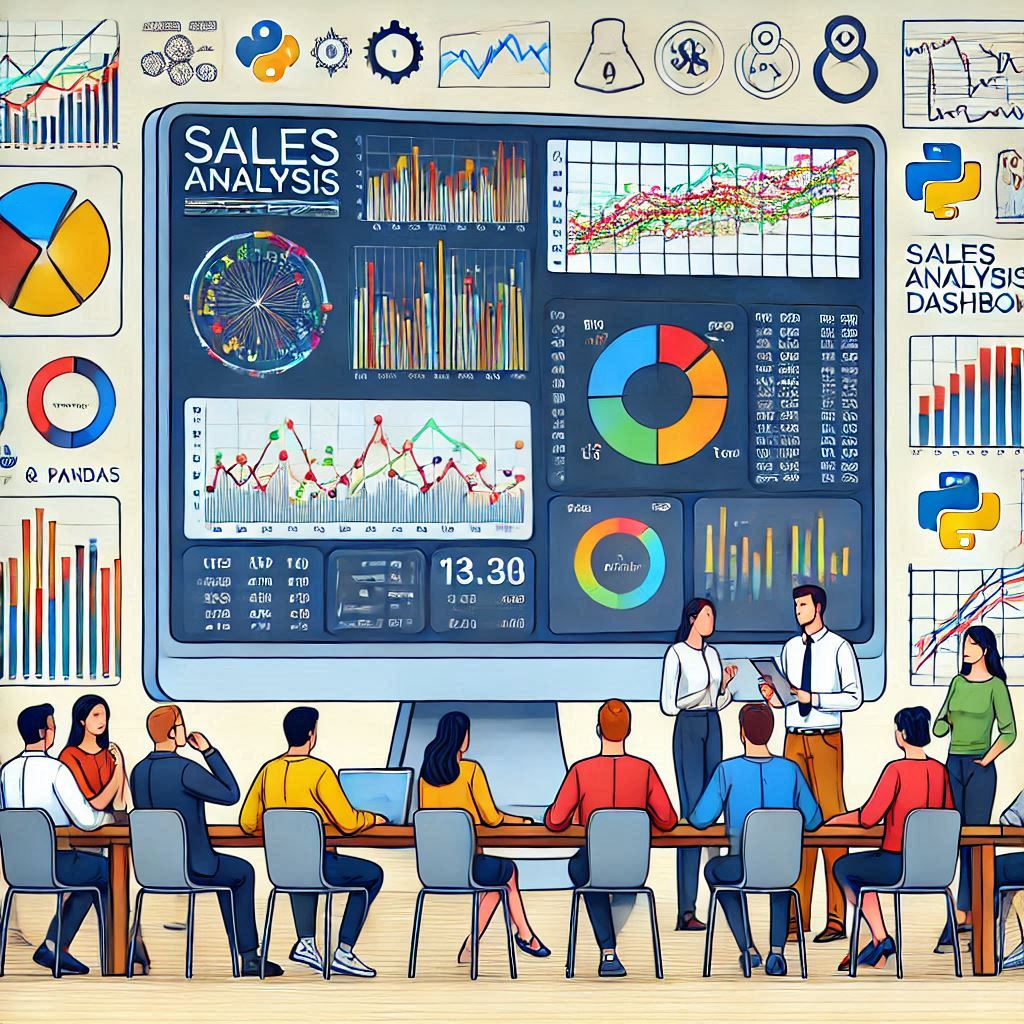

## Objetivo: Manipulación y exploración de datos con Pandas.
### Técnica utilizada:

Utilizo Python y Pandas para analizar y responder preguntas de negocio sobre los datos de ventas de SuperStore. Se utilizan Seaborn,Plotly Pandas y Matplotlib para la limpieza de datos y el análisis de datos.
Preguntas a responder:

    1. ¿Cuáles son los productos más vendidos?
    2. ¿Cuáles son los 10 productos con mejores ventas?
    3. ¿Cuáles son los productos más rentables?
    4. ¿Qué categoría tuvo más ventas?
    5. ¿Cuáles son las categorías más rentables?
    6. ¿Cuáles son los valores totales de ventas por categoría y subcategoría?
    7. ¿Cuáles son los productos más vendidos en las subcategorías?
    8. ¿Qué segmentos de clientes son los más rentables?
    9. ¿Qué modos de envío vendieron más productos?
    10. Visualizar la columna 'Categoría' desde el punto de vista del conjunto de datos de la columna 'Modo de envío'.
    11. ¿Qué mercado vendió más productos?
    12. ¿Cuáles son los 10 países con más ventas?
    13. ¿Cuál es el costo promedio de envío para los 10 países diferentes con más ventas?
    14. ¿Quiénes son los 10 clientes más rentables?
    15. ¿Cuáles son los valores totales de ventas por año y mes?


In [1]:
#ejecutar si no esta instalado en tu entorno
!pip install missingno

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly Express es una biblioteca de alto nivel para la creación de visualizaciones interactivas en Python.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Esta clase se utiliza para manipular fechas y horas.
from datetime import datetime

# Se utiliza para manejar advertencias en Python.
import warnings
# Configurar Matplotlib para mostrar gráficos en línea en Jupyter Notebooks.
%matplotlib inline
# Se utiliza para tratar cadenas de texto como archivos.
from io import StringIO
# Importamos la librería Missingno para poder visualizar nuestros valores nulos presentes.
import missingno as msno

# Tema de colores
theme = [
    "#DEF5E5",  # Un tono claro de verde.
    "#459E97",  # Un tono más oscuro de verde.
    "#4B9ABB",  # Un tono de azul.
    "#0A4361",  # Un tono más oscuro de azul.
    "#E68193",  # Un tono de rosa.
]


In [ ]:
url_store = 'superstore_sales.xlsx'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Cargar el set de datos
df_store = pd.read_excel('/content/drive/MyDrive/Alura/Projects/Store_analisis/superstore_sales.xlsx')
df_store.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011


In [6]:
#¿Cuántas características tiene el conjunto de datos?
num_features = df_store.shape[1]
print("************************************************************")
print(f"El conjunto de datos tiene {num_features} características.")
print("************************************************************")

************************************************************
El conjunto de datos tiene 21 características.
************************************************************


In [8]:
#¿Cuántas características son numéricas, textuales, categóricas o booleanas?
numerical_features = df_store.select_dtypes(include=['int64', 'float64']).columns
textual_features = df_store.select_dtypes(include=['object']).columns
categorical_features = df_store.select_dtypes(include=['category']).columns
boolean_features = df_store.select_dtypes(include=['bool']).columns

print("************************************************************")
print(f"Número de características numéricas: {len(numerical_features)}")
print("************************************************************")
print(f"Número de características textuales: {len(textual_features)}")
print("************************************************************")
print(f"Número de características categóricas: {len(categorical_features)}")
print("************************************************************")
print(f"Número de características booleanas: {len(boolean_features)}")
print("************************************************************")

# ¿Hay alguna dependencia estadística entre las características?
# Calcular la matriz de correlación para las características numéricas
correlation_matrix = df_store[numerical_features].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación para las características numéricas:")
print(correlation_matrix)

# Para las características categóricas y booleanas, podemos usar pruebas de chi-cuadrado

from scipy.stats import chi2_contingency

# prueba de chi-cuadrado entre dos características categóricas
if len(categorical_features) >= 2:
    contingency_table = pd.crosstab(df_store[categorical_features[0]], df_store[categorical_features[1]])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print("************************************************************")
    print(f"Prueba de chi-cuadrado entre {categorical_features[0]} y {categorical_features[1]}:")
    print("************************************************************")
    print(f"Chi2: {chi2}, p-value: {p}")
    print("************************************************************")
else:
    print("************************************************************")
    print("No hay suficientes características categóricas para realizar la prueba de chi-cuadrado.")
    print("************************************************************")

************************************************************
Número de características numéricas: 6
************************************************************
Número de características textuales: 13
************************************************************
Número de características categóricas: 0
************************************************************
Número de características booleanas: 0
************************************************************
Matriz de correlación para las características numéricas:
                  sales  quantity  discount    profit  shipping_cost      year
sales          1.000000  0.313577 -0.086722  0.485939       0.768073 -0.002905
quantity       0.313577  1.000000 -0.019875  0.104743       0.272649 -0.005049
discount      -0.086722 -0.019875  1.000000 -0.316375      -0.079055 -0.005894
profit         0.485939  0.104743 -0.316375  1.000000       0.357033  0.002661
shipping_cost  0.768073  0.272649 -0.079055  0.357033       1.000000 -0.003137
year

In [9]:
# Crear un gráfico de calor (heatmap) de la matriz de correlación
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlación')
))

# Personalizar el gráfico
fig.update_layout(
    title='Matriz de Correlación',
    xaxis_nticks=36,
    yaxis_nticks=36,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    xaxis_showline=False,
    yaxis_showline=False,
    xaxis_tickfont=dict(size=10),
    yaxis_tickfont=dict(size=10),
)

# Mostrar el gráfico
fig.show()

#### vamos a desglosar y explicar los resultados de la matriz de correlación.La matriz de correlación muestra cómo se relacionan las diferentes variables numéricas entre sí. Los valores de la matriz de correlación varían entre -1 y 1, donde:

*   1 indica una correlación perfecta positiva.
*   -1 indica una correlación perfecta negativa.
*   0 indica que no hay correlación.


### 1.  Sales (Ventas):

* Sales vs. Quantity (Cantidad): 0.313577. Hay una correlación positiva moderada entre las ventas y la cantidad. Esto significa que a medida que aumenta la cantidad vendida, las ventas tienden a aumentar.
   
* Sales vs. Discount (Descuento): -0.086722. Hay una correlación negativa débil entre las ventas y el descuento. Esto sugiere que los descuentos no tienen un impacto significativo en las ventas.
   
* Sales vs. Profit (Beneficio): 0.485939. Hay una correlación positiva moderada entre las ventas y el beneficio. Esto indica que a medida que aumentan las ventas, el beneficio tiende a aumentar.
   
* Sales vs. Shipping Cost (Costo de envío): 0.768073. Hay una correlación positiva fuerte entre las ventas y el costo de envío. Esto sugiere que los productos con mayores ventas tienden a tener mayores costos de envío.
   
* Sales vs. Year (Año): -0.002905. Hay una correlación negativa muy débil entre las ventas y el año. Esto indica que no hay una relación significativa entre las ventas y el año.

### 2. Quantity (Cantidad):
       
* Quantity vs. Discount (Descuento): -0.019875. Hay una correlación negativa muy débil entre la cantidad y el descuento. Esto sugiere que los descuentos no tienen un impacto significativo en la cantidad vendida.
        
* Quantity vs. Profit (Beneficio): 0.104743. Hay una correlación positiva débil entre la cantidad y el beneficio. Esto indica que a medida que aumenta la cantidad vendida, el beneficio tiende a aumentar ligeramente.
        
* Quantity vs. Shipping Cost (Costo de envío): 0.272649. Hay una correlación positiva moderada entre la cantidad y el costo de envío. Esto sugiere que los productos con mayores cantidades vendidas tienden a tener mayores costos de envío.
        
* Quantity vs. Year (Año): -0.005049. Hay una correlación negativa muy débil entre la cantidad y el año. Esto indica que no hay una relación significativa entre la cantidad vendida y el año.

### 3.Discount (Descuento):
    
* Discount vs. Profit (Beneficio): -0.316375. Hay una correlación negativa moderada entre el descuento y el beneficio. Esto indica que a medida que aumenta el descuento, el beneficio tiende a disminuir.
     
* Discount vs. Shipping Cost (Costo de envío): -0.079055. Hay una correlación negativa débil entre el descuento y el costo de envío. Esto sugiere que los descuentos no tienen un impacto significativo en el costo de envío.
        
* Discount vs. Year (Año): -0.005894. Hay una correlación negativa muy débil entre el descuento y el año. Esto indica que no hay una relación significativa entre el descuento y el año.

### 4.Profit (Beneficio):
      
* Profit vs. Shipping Cost (Costo de envío): 0.357033. Hay una correlación positiva moderada entre el beneficio y el costo de envío. Esto indica que a medida que aumenta el costo de envío, el beneficio tiende a aumentar.
     
* Profit vs. Year (Año): 0.002661. Hay una correlación positiva muy débil entre el beneficio y el año. Esto indica que no hay una relación significativa entre el beneficio y el año.

### 5. Shipping Cost (Costo de envío):
       
* Shipping Cost vs. Year (Año): -0.003137. Hay una correlación negativa muy débil entre el costo de envío y el año. Esto indica que no hay una relación significativa entre el costo de envío y el año.

* Year (Año):
  
  Year vs. Year (Año): 1.000000. La correlación de una variable consigo misma es siempre 1.

## Conclusión

La matriz de correlación proporciona información valiosa sobre cómo se relacionan las diferentes variables numéricas entre sí. Por ejemplo, hay una correlación positiva fuerte entre las ventas y el costo de envío, lo que sugiere que los productos con mayores ventas tienden a tener mayores costos de envío. Además, hay una correlación negativa moderada entre el descuento y el beneficio, lo que indica que los descuentos tienden a reducir el beneficio.

Esta información puede ser útil para tomar decisiones informadas sobre estrategias de ventas, descuentos y gestión de costos de envío.


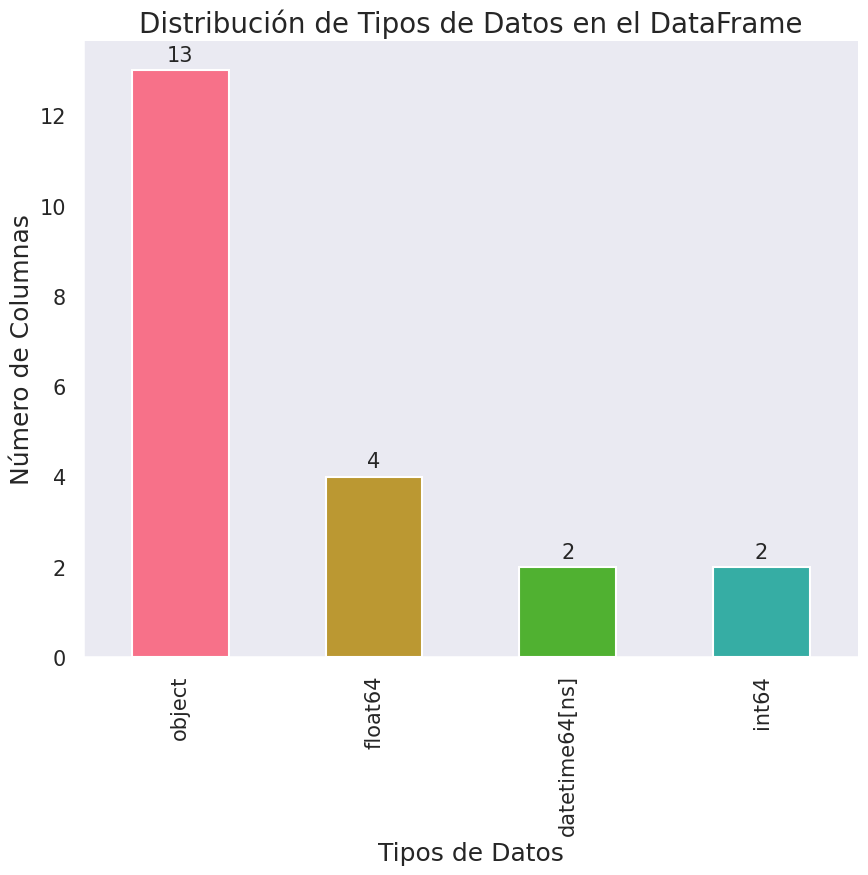

In [14]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_store.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [15]:
#Información de los datos
print("************************************************************")
print("Número de filas: ",df_store.shape[0])
print("************************************************************")
print("Número de Columnas:",df_store.shape[1])
print("************************************************************")
print("Datos Duplicados",df_store.duplicated().sum())
print("************************************************************")
print("Variables Categóricas: ",df_store.select_dtypes(include='object').shape[1])
print("************************************************************")
print("Variables Numéricas: ",df_store.select_dtypes(exclude='object').shape[1])
print("************************************************************")

************************************************************
Número de filas:  51290
************************************************************
Número de Columnas: 21
************************************************************
Datos Duplicados 0
************************************************************
Variables Categóricas:  13
************************************************************
Variables Numéricas:  8
************************************************************


In [16]:
#datos nulos por columna
df_store.isnull().sum().sort_values(ascending=False)

,0
order_id,0
category,0
order_priority,0
shipping_cost,0
profit,0
discount,0
quantity,0
sales,0
product_name,0
sub_category,0


Text(0, 0.5, 'Filas')

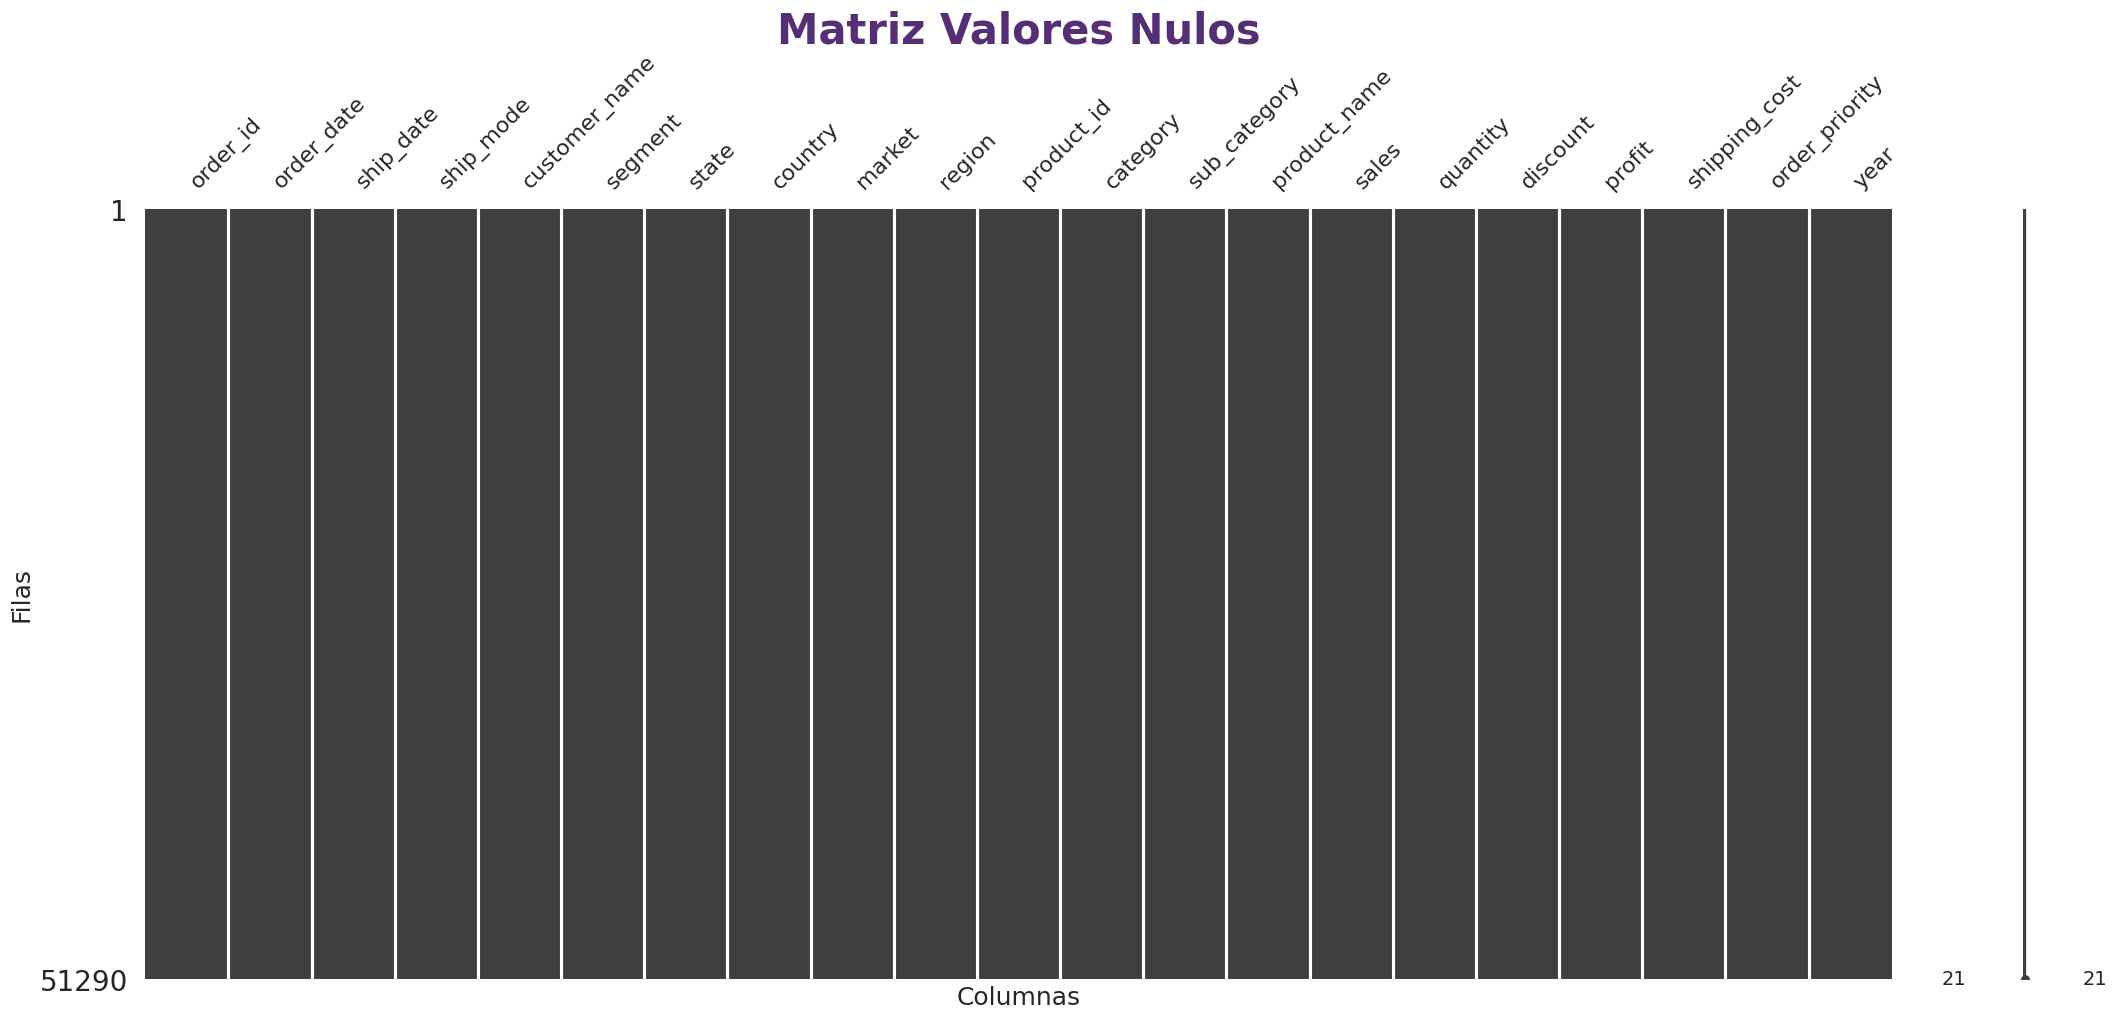

In [17]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_store)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

## ¿Cuáles son los productos más vendidos?

In [18]:
# Agrupar los datos por producto y sumar las cantidades vendidas
most_selling_products = df_store.groupby('product_name')['quantity'].sum().reset_index()

# Ordenar los productos por cantidad vendida en orden descendente
most_selling_products = most_selling_products.sort_values(by='quantity', ascending=False)[:10]

# Mostrar los productos más vendidos
print("Los productos más vendidos son:")
print("************************************************************")
most_selling_products

Los productos más vendidos son:
************************************************************


,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


In [21]:
# Crear un gráfico de barras con Plotly
fig = px.bar(most_selling_products.head(10), x='product_name', y='quantity', title='Top 10 Productos Más Vendidos',
             labels={'quantity': 'Cantidad Vendida', 'product_name': 'product_name'}, color='quantity',
             color_continuous_scale='Viridis', text='quantity')

# Añadir los valores exactos a las etiquetas dentro de las barras
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Rotar las etiquetas del eje x
fig.update_layout(xaxis_tickangle=-45, height=600, width=1000)

# Mostrar el gráfico
fig.show()

## ¿Cuáles son los 10 productos con más ventas?

In [22]:
# Agrupar los datos por producto y sumar las cantidades vendidas
productSales  = df_store.groupby('product_name')['sales'].sum().reset_index()

# Ordenar los productos por cantidad vendida en orden descendente
productSales = productSales.sort_values(by='sales', ascending=False)[:10]

# Mostrar los productos más vendidos
print("Los productos con mas Ventas son:")
print("************************************************************")
productSales

Los productos con mas Ventas son:
************************************************************


,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


In [25]:
# Crear un gráfico de barras con Plotly
fig = px.bar(productSales.head(10), x='product_name', y='sales', title='Top 10 Productos con mas ventas',
             labels={'sales': 'Valor en ventas Vendida', 'product_name': 'product_name'}, color='sales',
             color_continuous_scale='Viridis', text='sales')

# Añadir los valores exactos a las etiquetas dentro de las barras
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Rotar las etiquetas del eje x
fig.update_layout(xaxis_tickangle=-45, height=600, width=1000)

# Mostrar el gráfico
fig.show()


## ¿Cuáles son los productos más rentables?

In [26]:
# Agrupar los datos por producto y sumar las cantidades vendidas
profitable_products   = df_store.groupby('product_name')['profit'].sum().reset_index()

# Ordenar los productos por cantidad vendida en orden descendente
profitable_products  = profitable_products .sort_values(by='profit', ascending=False)[:10]

# Mostrar los productos más vendidos
print("Los productos con mas rentables son:")
print("************************************************************")
profitable_products

Los productos con mas rentables son:
************************************************************


,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


In [28]:
# Crear un gráfico de barras con Plotly
fig = px.bar(profitable_products.head(10), x='product_name', y='profit', title='Top 10 Productos mas rentables',
             labels={'profit': 'Valor en ventas Vendida', 'product_name': 'product_name'}, color='profit',
             color_continuous_scale='Viridis', text='profit')

# Añadir los valores exactos a las etiquetas dentro de las barras
fig.update_traces(texttemplate='%{text}', textposition='inside')

# Rotar las etiquetas del eje x
fig.update_layout(xaxis_tickangle=-45, height=600, width=1000)

# Mostrar el gráfico
fig.show()


## ¿Qué categoría vendió más?

In [29]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [30]:
df_store.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [31]:
# Agrupar los datos por 'category' y 'year' y sumar las columnas numéricas
category_year_sales = df_store.groupby(['category']).agg({
    'sales': 'sum',
    'quantity': 'sum',
    'discount': 'sum',
    'profit': 'sum',
    'shipping_cost': 'sum',
    'year': 'sum',
}).reset_index()

# Ordenar las categorías por ventas en orden descendente
category_year_sales = category_year_sales.sort_values(by='sales', ascending=False)

# Ajustar la configuración de Pandas para mostrar los números en formato decimal
pd.options.display.float_format = '{:.2f}'.format

# Mostrar las categorías más vendidas
print("************************************************************")
print("Las categorías más vendidas por año son:")
print("************************************************************")
category_year_sales


************************************************************
Las categorías más vendidas por año son:
************************************************************


,category,sales,quantity,discount,profit,shipping_cost,year
2,Technology,4744557.50,35176,1372.51,663778.73,507047.88,20411498
0,Furniture,4110874.19,34954,1660.03,286782.25,440319.48,19878166
1,Office Supplies,3787070.23,108182,4297.19,518473.83,405448.34,62945679


### ¿Cuáles son las categorías más rentables?"

In [32]:
# Agrupar los datos por 'category' y sumar los valores de 'profit'
profitable_category = df_store.groupby('category')['profit'].sum().reset_index()

# Ordenar las categorías por 'profit' en orden descendente
profitable_category = profitable_category.sort_values(by='profit', ascending=False)

# Mostrar las categorías más rentables
print("************************************************************")
print("Las categorías más rentables son:")
print("************************************************************")
profitable_category


************************************************************
Las categorías más rentables son:
************************************************************


,category,profit
2,Technology,663778.73
1,Office Supplies,518473.83
0,Furniture,286782.25


In [33]:
# Crear un gráfico de barras con Plotly
fig = px.bar(profitable_category, x='category', y='profit', title='Categorías más rentables',
             labels={'profit': 'Beneficio', 'category': 'Categoría'}, color='profit',
             color_continuous_scale='Viridis', text='profit')

# Añadir los valores a las etiquetas dentro de las barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='inside')

# Rotar las etiquetas del eje x
fig.update_layout(xaxis_tickangle=-45, height=600, width=800)

# Mostrar el gráfico
fig.show()



### Valores totales de ventas por categoría y subcategoría

In [34]:
# Agrupar los datos por 'category' y 'sub_category' y sumar las columnas numéricas
category_subcategory_sales = df_store.groupby(['category', 'sub_category', 'year']).agg({
    'sales': 'sum',
    'quantity': 'sum',
    'discount': 'sum',
    'profit': 'sum',
    'shipping_cost': 'sum'
}).reset_index()

# Ordenar las categorías por ventas en orden descendente
category_subcategory_sales = category_subcategory_sales.sort_values(by='sales', ascending=False)

# Ajustar la configuración de Pandas para mostrar los números en formato decimal
pd.options.display.float_format = '{:.2f}'.format

# Mostrar las categorías más vendidas
print("************************************************************")
print("Las categorías más vendidas y subcategoría por año son:")
print("************************************************************")
category_subcategory_sales


************************************************************
Las categorías más vendidas y subcategoría por año son:
************************************************************


,category,sub_category,year,sales,quantity,discount,profit,shipping_cost
67,Technology,Phones,2014,552006.38,3936,159.87,70657.64,60776.56
59,Technology,Copiers,2014,550384.89,2642,90.15,104048.54,56598.51
3,Furniture,Bookcases,2014,513196.71,2910,129.76,63219.05,56691.86
7,Furniture,Chairs,2014,493378.28,4034,187.46,41248.27,53125.54
66,Technology,Phones,2013,453519.00,3145,136.24,46908.83,47852.07
...,...,...,...,...,...,...,...,...
33,Office Supplies,Fasteners,2012,19477.69,1887,65.23,3003.98,2206.61
38,Office Supplies,Labels,2013,18380.79,2433,85.24,3606.57,1993.31
37,Office Supplies,Labels,2012,15518.27,1889,66.79,3230.34,1688.42
36,Office Supplies,Labels,2011,13616.46,1705,52.95,3118.89,1353.54


###  ¿Cuáles son los productos más vendidos en cada subcategoría?

In [35]:
product_counts= df_store.groupby(["category", "sub_category"], as_index=False)["quantity"].count()
# Mostrar los productos más vendidos en cada subcategoría
print("************************************************************")
print("Los productos más vendidos en cada subcategoría son:")
print("************************************************************")
product_counts

************************************************************
Los productos más vendidos en cada subcategoría son:
************************************************************


,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


### ¿Qué segmentos de clientes son los más rentables?

In [36]:
# Agrupar los datos por 'segment' y sumar las columnas numéricas
profitable_segment = df_store.groupby('segment')['profit'].sum().reset_index()

# Ordenar los segmentos por 'profit' en orden descendente
profitable_segment = profitable_segment.sort_values(by='profit', ascending=False)

# Mostrar los segmentos más rentables
print("************************************************************")
print("Los segmentos de clientes más rentables son:")
print("************************************************************")
profitable_segment


************************************************************
Los segmentos de clientes más rentables son:
************************************************************


,segment,profit
0,Consumer,749239.78
1,Corporate,442785.86
2,Home Office,277009.18


In [37]:
# Crear un gráfico de barras con Plotly
fig = px.bar(profitable_segment, x='segment', y='profit', title='Segmentos de Clientes Más Rentables',
             labels={'profit': 'Beneficio', 'segment': 'Segmento'}, color='profit',
             color_continuous_scale='Viridis', text='profit')

# Añadir los valores a las etiquetas dentro de las barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Rotar las etiquetas del eje x
fig.update_layout(xaxis_tickangle=-45, height=600, width=800)

# Mostrar el gráfico
fig.show()


###  ¿Qué modos de envío vendieron más productos?

<ipython-input-38-f1a66eb4a4b7>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




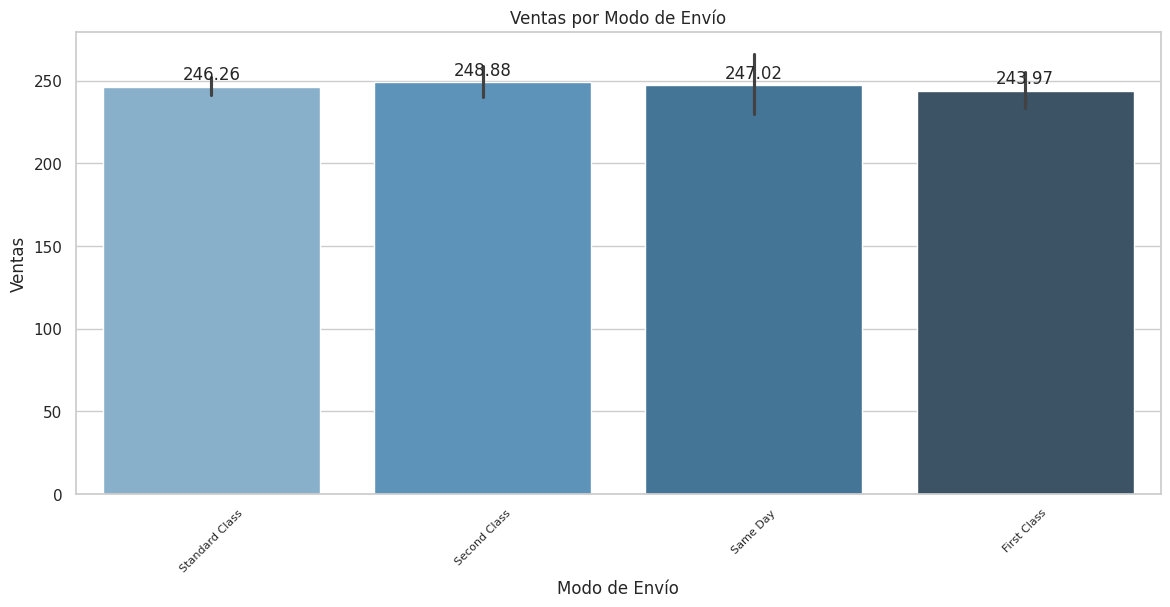

In [38]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='ship_mode', y='sales', data=df_store, palette='Blues_d')

# Añadir los valores a las etiquetas dentro de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, size=8)

# Añadir título y etiquetas de los ejes
plt.title('Ventas por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()


### Visualice la columna 'Categoría' desde los puntos de vista del conjunto de datos de la columna Shipmode.

In [40]:
# Crear una lista de modos de envío únicos
ship_modes = df_store['ship_mode'].unique()

# Crear una figura de subplots con Plotly
fig = make_subplots(rows=1, cols=len(ship_modes), subplot_titles=ship_modes)

# Crear un histograma para cada modo de envío
for i, ship_mode in enumerate(ship_modes):
    subset = df_store[df_store['ship_mode'] == ship_mode]
    hist = go.Histogram(x=subset['category'], name=ship_mode, marker_color=px.colors.qualitative.Plotly[i])
    fig.add_trace(hist, row=1, col=i+1)

# Ajustar el diseño del gráfico
fig.update_layout(height=600, width=800, title_text="Histograma de Categorías por Modo de Envío")

# Mostrar el gráfico
fig.show()


### ¿En qué mercado se vendieron más productos?

In [44]:
# Contar el número de ocurrencias de cada mercado
df_count = df_store['market'].value_counts().reset_index()
df_count.columns = ['market', 'count']

# Crear un gráfico de barras con Plotly
fig = px.bar(df_count, x='market', y='count', title='Conteo de Mercados',
             labels={'market': 'Mercado', 'count': 'Conteo'}, color='market',
             color_discrete_sequence=px.colors.qualitative.Plotly, text='count')

# Añadir los valores a las etiquetas dentro de las barras
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Rotar las etiquetas del eje x
fig.update_layout(xaxis_tickangle=-45, height=600, width=800,
                  title={
                      'text': 'Conteo de Mercados',
                      'y':0.9,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'})

# Mostrar el gráfico
fig.show()


### ¿Cuáles son los 10 países del Top 10 por ventas?

In [49]:
# Agrupar por 'country' y sumar solo las columnas numéricas
countries = df_store.groupby('country').sum(numeric_only=True)

# Ordenar los valores por 'sales' en orden descendente
countries.sort_values('sales', inplace=True, ascending=False)

# Mostrar los primeros 10 países con mayores ventas
print("************************************************************")
print("Los 10 países con mayores ventas son:")
print("************************************************************")
countries


************************************************************
Los 10 países con mayores ventas son:
************************************************************


,sales,quantity,discount,profit,shipping_cost,year
country,,,,,,
United States,2297200.86,37873,1561.09,286397.02,238173.79,20115153
Australia,925235.85,10673,407.20,105484.96,100359.02,5710392
France,858931.08,10804,204.35,109029.00,95387.81,5690342
China,700562.03,7081,26.90,150683.08,78957.02,3783912
Germany,628840.03,7745,117.80,107322.82,63965.18,4156227
...,...,...,...,...,...,...
Tajikistan,242.78,14,2.10,-262.87,18.08,6039
Macedonia,209.64,6,0.00,43.38,19.17,8053
Eritrea,187.74,4,0.00,76.20,8.55,4026


### Crea un gráfico circular con los 10 países que tienen más ventas

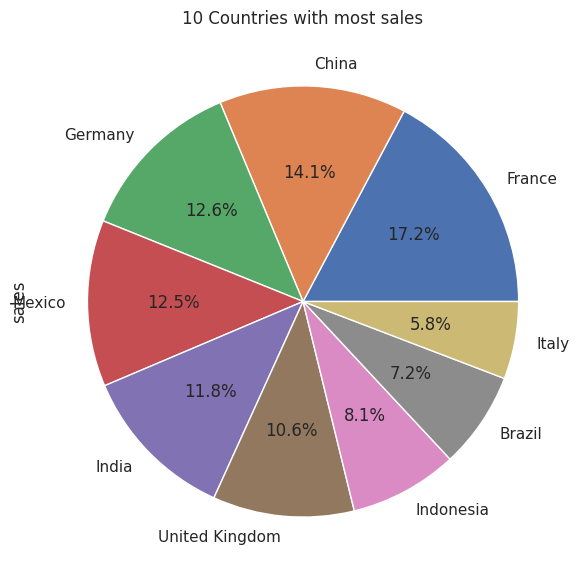

In [53]:
countries = countries.sort_values(by = 'sales',ascending = False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('Los 10 países con mayores ventas son:')
plt.show()

### ¿Cuáles son los costos de envío promedio para los 10 países principales?

In [55]:
df_store.groupby('country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost', ascending=False).head(10)

,shipping_cost
country,
Taiwan,155.66
Chad,148.97
Lesotho,135.65
Montenegro,93.94
Slovenia,61.22
Republic of the Congo,59.30
Central African Republic,57.63
Namibia,50.37
Bangladesh,46.40


### ¿Quiénes son los 10 clientes más rentables?

In [56]:
client_top_10 = df_store.sort_values('profit',ascending=False).head(10)[['order_id','customer_name','profit']]
client_top_10

,order_id,customer_name,profit
29530,CA-2013-118689,Tamara Chand,8399.98
36239,CA-2014-140151,Raymond Buch,6719.98
48097,CA-2014-166709,Hunter Lopez,5039.99
33011,CA-2013-117121,Adrian Barton,4946.37
5522,CA-2011-116904,Sanjit Chand,4630.48
43831,ES-2014-1651774,Patrick Jones,3979.08
46525,CA-2014-127180,Tom Ashbrook,3919.99
10265,CA-2012-145352,Christopher Martinez,3177.47
548,ID-2011-64599,Carol Adams,2939.31
24420,IN-2013-50809,Cynthia Arntzen,2817.99


### Agregar una nueva columna (mes)

In [58]:
# Convertir la columna 'order_date' a tipo string
month = df_store['order_date'].astype(str)

# Convertir las cadenas de fecha en objetos datetime
month = month.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Extraer el mes de cada objeto datetime y agregarlo como una nueva columna 'month'
df_store['month'] = month.map(lambda x: x.month)

# Mostrar el DataFrame resultante
df_store.head(3)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,2011,1
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,2011,1
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,2011,1


### Valores totales de ventas por año y mes

In [64]:
# Convertir la columna 'order_date' a tipo datetime
df_store['order_date'] = pd.to_datetime(df_store['order_date'])

# Extraer el año y el mes de la columna 'order_date'
df_store['year'] = df_store['order_date'].dt.year
df_store['month'] = df_store['order_date'].dt.month

# Agrupar por 'year' y 'month' y sumar las ventas
date = df_store.groupby(['year', 'month']).sum(numeric_only=True)

# Mostrar el DataFrame resultante
date


sales  quantity  discount   profit  shipping_cost
year month                                                      
2011 1      98898.49      1463     68.76  8321.80       10544.79
     2      91152.16      1224     52.25 12417.91       10681.16
     3     145729.37      1836     74.21 15303.57       13096.19
     4     116915.76      2020     80.78 12902.32       12954.52
     5     146747.84      2013     82.38 12183.83       16443.21
     6     215207.38      3112    159.53 23415.25       23813.11
     7     115510.42      1774     80.09  5585.00       11844.48
     8     207581.49      3035    121.46 23713.67       22001.14
     9     290214.46      3707    137.68 35776.88       29664.85
     10    199071.26      2727    110.19 25963.42       21380.08
     11    298496.54      4039    178.84 32709.18       34702.00
     12    333925.73      4493    187.22 40647.98       37144.83
2012 1     135780.72      1845     74.45 10401.64       13665.75
     2     100510.22      1473     62.78 15000.10       11393.73
     3     163076.77      2237    101.68 17992.92       16170.78
     4     161052.27      2250     93.25 17366.97       16767.86
     5     208364.89      2921    114.27 29876.70       23801.62
     6     256175.70      3671    168.28 34407.15       28155.90
     7     145236.79      2321    104.40 15585.39       17334.44
     8     303142.94      3818    136.17 43573.88       32038.73
     9     289389.17      4205    169.07 27776.18       28023.18
     10    252939.85      3563    135.87 30662.88       25085.74
     11    323512.42      5193    215.87 31820.72       33489.74
     12    338256.97      4614    172.68 32950.75       37563.36
2013 1     199185.91      2413     91.44 26810.56       21677.43
     2     167239.65      2102     78.01 25340.03       16911.85
     3     198594.03      2686    114.38 23433.77       21268.01
     4     177821.32      2688    116.12 19462.04       19133.23
     5     260498.56      3808    153.09 28495.69       28315.21
     6     396519.61      5327    213.64 45478.41       42814.03
     7     229928.95      3252    125.64 28863.83       24501.84
     8     326488.79      4934    202.64 31023.67       35673.09
     9     376619.25      5793    240.67 38905.67       38488.40
     10    293406.64      3883    160.86 42433.22       31174.68
     11    373989.36      5556    215.32 48063.00       41407.17
     12    405454.38      5694    223.69 50202.87       43183.80
2014 1     241268.56      3122    127.93 28001.39       24870.80
     2     184837.36      2482    111.13 19751.70       19525.80
     3     263100.77      3722    142.02 37357.26       26838.64
     4     242771.86      3594    164.00 23782.30       26272.72
     5     288401.05      4300    188.99 33953.56       31882.58
     6     401814.06      6009    251.46 43778.60       41894.08
     7     258705.68      3637    163.51 28035.87       29581.73
     8     456619.94      5824    217.67 53542.89       46759.35
     9     481157.24      6837    272.09 67979.45       53485.43
     10    422766.63      5876    233.75 58209.83       44622.41
     11    555279.03      7706    304.38 62856.59       59918.36
     12    503143.69      7513    335.11 46916.52       54853.89

### Cuadro de ventas totales por año

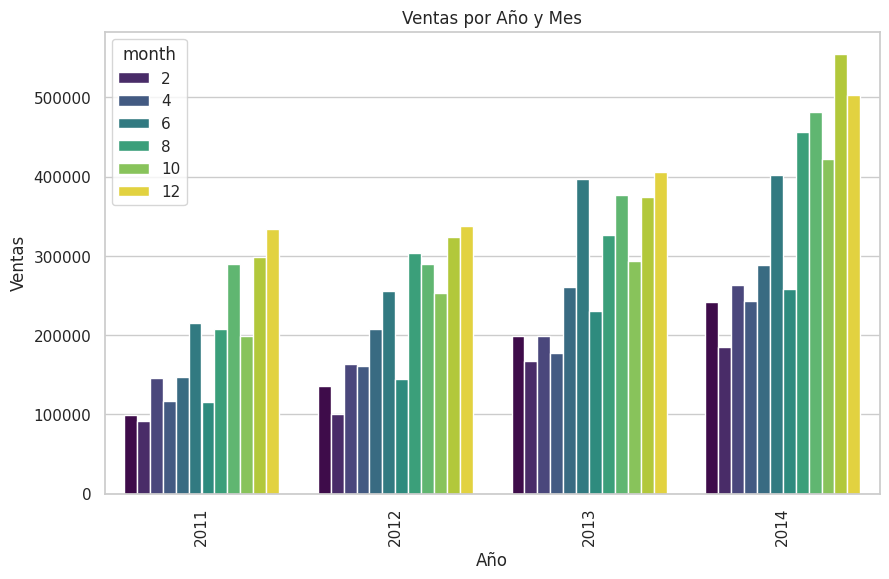

In [66]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='sales', data=date, hue='month', palette='viridis')

# Rotar las etiquetas del eje x
plt.xticks(rotation='vertical')

# Añadir título y etiquetas a los ejes
plt.title('Ventas por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Ventas')

# Mostrar el gráfico
plt.show()
